# Library

In [1]:
# plot learning curve of an xgboost model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import scoring, model
%reload_ext autoreload

# Classification

# Create dummy data

In [39]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [40]:
models,model_name,probs_model,probs_dual_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,['xgb','lr','random_forest'],
    types='classification',detail=False)

we have done with these models:
Random Forest
Xgboost
Logistic_Regression


# print score

## classification

comfusion matrix = 
[[49  4]
 [ 1 89]]


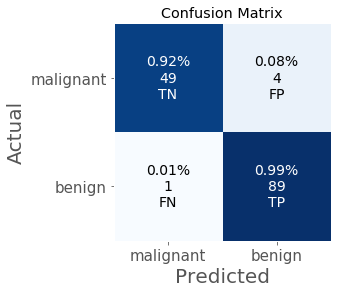


accuracy_score =  0.965
balanced_accuracy_score =  0.9567
Logloss =  0.0865

precision score =  0.957
average precision score =  0.9533
recall score =  0.9889
Brier score loss (the smaller the better) =  0.0235

F1 score =  0.9727
F2 score =  0.9823
F3 score =  0.9856
F_beta score (0.5) =  0.9632
Matthews Correlation Coefficient score =  0.9251

AUC of Precision-Recall Curve on Testing =  0.9959
Best Threshold for Precision-Recall Curve = 0.860900
F-Score = 0.983
AUC of ROC =  0.9937

Best Threshold for ROC = 0.860900
G-Mean = 0.980
Best Threshold with Youden’s J statistic = 0.860900

Cohens kappa =  0.9242
Gini =  0.9918

Expected Approval Rate =  0.6503
Expected Default Rate =  0.043

classification_report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted 

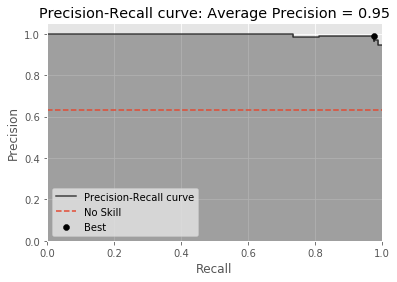

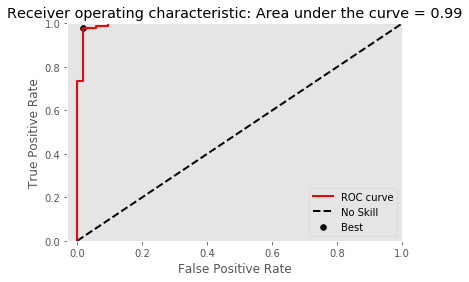


time span=  0:00:07.460580


In [43]:
scoring.print_score(y_test,pred_model[1],y_probs=probs_model[1],
                    types='classification',labels=['malignant', 'benign'],
                    time1=time_1[1],time2=time_2[1],
                    X_train=None, y_train=None,X_test=None)

,Eval_params,Random Forest Classifier,Xgboost,LogisticRegression
0,accuracy score,0.958,0.965,0.958
1,balanced accuracy score,0.9512,0.9567,0.9473
2,Logloss,0.1054,0.0865,0.0926
3,precision score,0.9565,0.957,0.9468
4,average precision score,0.9493,0.9533,0.9433
5,recall score,0.9778,0.9889,0.9889
6,Brier score loss,0.0311,0.0235,0.0289
7,F1 score,0.967,0.9727,0.9674
8,F2 score,0.9735,0.9823,0.9802
9,F3 score,0.9756,0.9856,0.9845


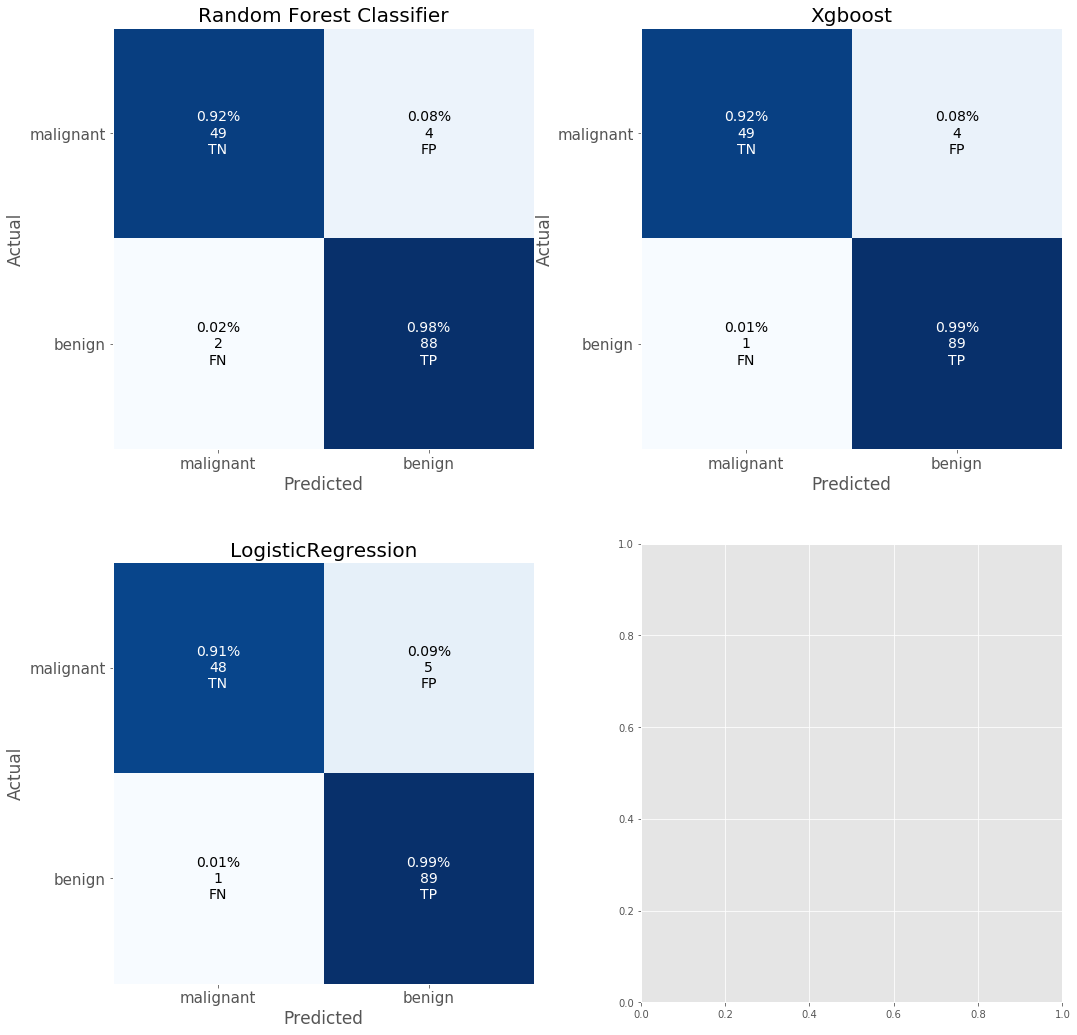

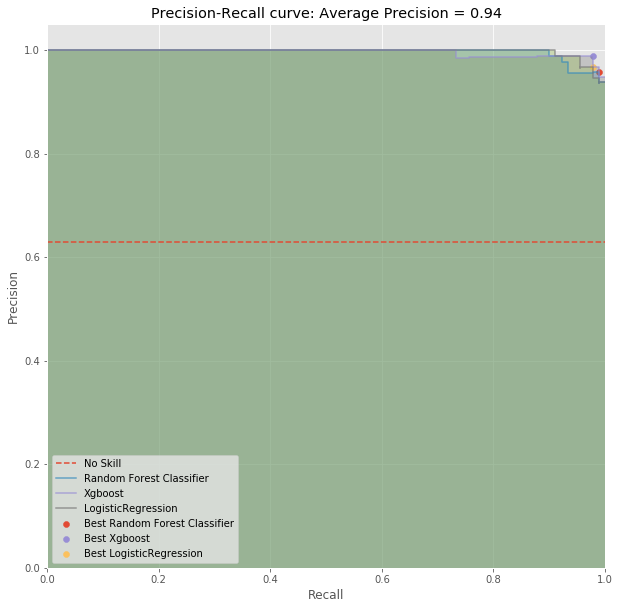

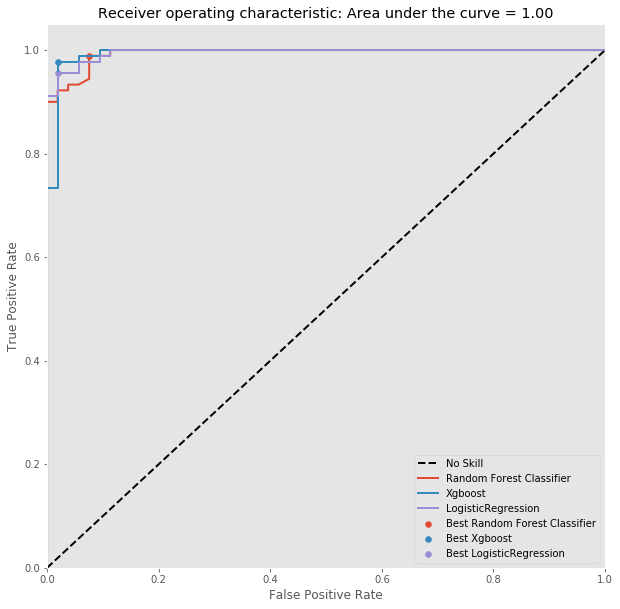

In [45]:
result,report = scoring.print_score_detail(y_test,pred_model,y_probs=probs_model,
                                    names_model=model_name,types='classification',
                                    labels=['malignant', 'benign'],
                                    time1=time_1,time2=time_2,
                                    X_train=None, y_train=None,X_test=None)

## regression

In [78]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

In [83]:
models,model_name,probs_model,probs_dual_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,['xgb','elastic_net','random_forest'],
    types='regression',detail=False)

we have done with these models:
Elastic Net
Random Forest
Xgboost



Mean Absolute Percentage Error (MAPE)               = 27.01 %
Symmetric mean absolute percentage error (SMAPE)    = 79.04999913713627 %
R2                                                  = 76.26 %
Mean Absolute Error (MAE)                           = 88.04
Median Absolute Error (MAE)                         = 72.07
Mean Square Error (MSE)                             = 12681.87
Root Mean Absolute Error (RMAE)                     = 9.38
Root Mean Absolute Error (RMSE)                     = 112.61
Mean Absolute Scaled Error (MASE)                   = 0.33
Median absolute deviation                           = 106.86
Max Error                                           = 485.57
Explained Variance Score                            = 0.76


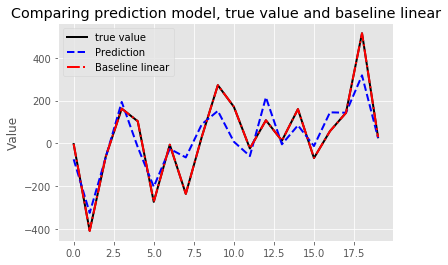


time span=  0:00:00.356922


In [86]:
scoring.print_score(y_test,pred_model[1],
                    types='regression',
                    time1=time_1[1],time2=time_2[1],
                    X_train=X_train, y_train=y_train,X_test=X_test)

,Eval_params,ElasticNet,Random Forest Regression,Xgboost
0,Mean Absolute Percentage Error (MAPE),0.18,27.01,33.19
1,Symmetric mean absolute percentage error (SMAPE),43.4384,79.05,56.3948
2,R2,88.1425,76.2617,90.2805
3,Mean Absolute Error (MAE),63.2276,88.035,56.5256
4,Median Absolute Error (MAE),52.4627,72.0653,46.3967
5,Mean Square Error (MSE),6334.73,12681.9,5192.53
6,Root Mean Absolute Error (RMAE),7.9516,9.3827,7.5184
7,Root Mean Absolute Error (RMSE),79.591,112.614,72.0592
8,Mean Absolute Scaled Error (MASE),0.2368,0.3298,0.2117
9,Median absolute deviation,78.02,106.86,68.76


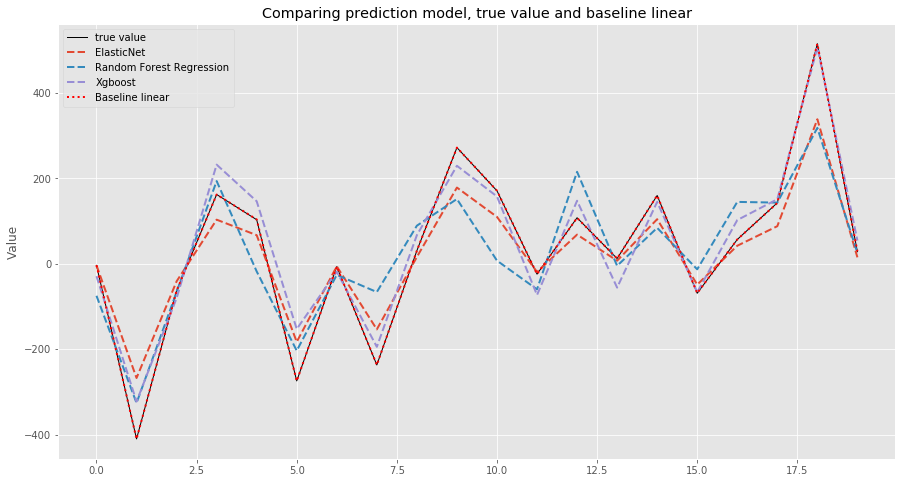

In [93]:
result = scoring.print_score_detail(y_test,pred_model,
                                    names_model=model_name,types='regression',
                                    time1=time_1,time2=time_2,
                                    X_train=X_train, y_train=y_train,X_test=X_test)

#  Regression voting ensembles weighted

In [54]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

In [55]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_full, y_train_full, X_test, y_test,
                                "soft",'regression')

fit and evaluate each model
>rank 3 -> knn: -10016.853
>rank 2 -> cart: -13332.473
>rank 1 -> svm: -13819.499
Weighted Avg MAE: 104.394
Voting MAE: 102.356
Ranking Weighted MAE: 97.031


In [56]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test)


Mean Absolute Percentage Error (MAPE)               = 14.79 %
Symmetric mean absolute percentage error (SMAPE)    = 89.20224689515452 %
R2                                                  = 66.65 %
Mean Absolute Error (MAE)                           = 104.39
Median Absolute Error (MAE)                         = 84.85
Mean Square Error (MSE)                             = 17818.39
Root Mean Absolute Error (RMAE)                     = 10.22
Root Mean Absolute Error (RMSE)                     = 133.49
Mean Absolute Scaled Error (MASE)                   = 0.4
Median absolute deviation                           = 125.69
Max Error                                           = 515.13
Explained Variance Score                            = 0.67


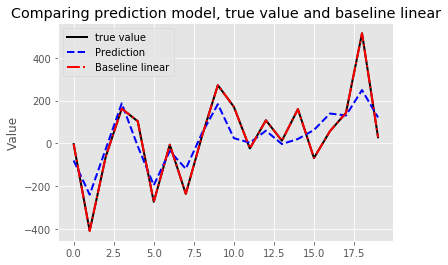


time span=  1


In [77]:
result = scoring.print_score(y_test,y_pred,y_pred,
                    types='regression',labels=None,time1=1,time2=2,
                    X_train=X_train_full, y_train=y_train_full,X_test=X_test)

# multiple model compare

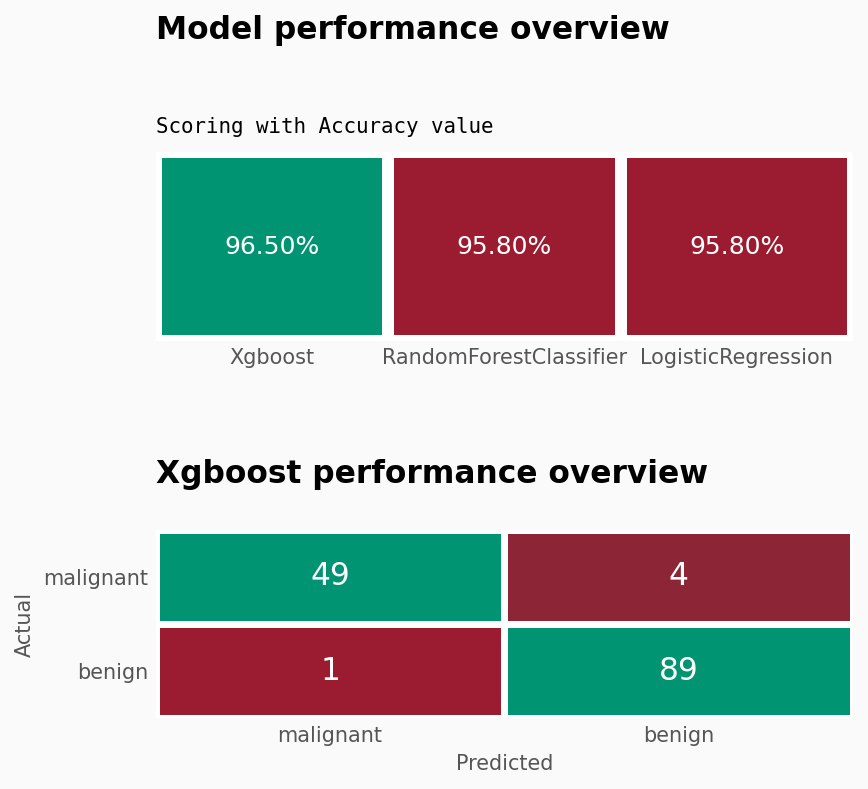

In [48]:
scoring.multiple_model(model_name,models,y_test,pred_model,['malignant', 'benign'])

# prob to label with threshold

In [27]:
scoring.prob_to_label_thres(probs_model[0], 0.8359)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Find the best treshold

In [62]:
scoring.compare_threshold(models[0],X_test,y_test,[1-0.8359,0.3,0.5,0.8359,0.9])

,0.1641,0.3000,0.5000,0.8359,0.9000
accuracy,0.9580,0.9580,0.9510,0.9580,0.9371
balanced_accuracy,0.9434,0.9473,0.9417,0.9589,0.9422
recall,1.0000,0.9889,0.9778,0.9556,0.9222
precision,0.9375,0.9468,0.9462,0.9773,0.9765
avg_precision,0.9375,0.9433,0.9392,0.9618,0.9495
F1,0.9677,0.9674,0.9617,0.9663,0.9486
F2,0.9494,0.9549,0.9524,0.9729,0.9651
F3,0.9434,0.9509,0.9493,0.9751,0.9708
F_beta_score,0.9494,0.9549,0.9524,0.9729,0.9651
matthews_score,0.9118,0.9103,0.8948,0.9112,0.8700


# Reliability diagram

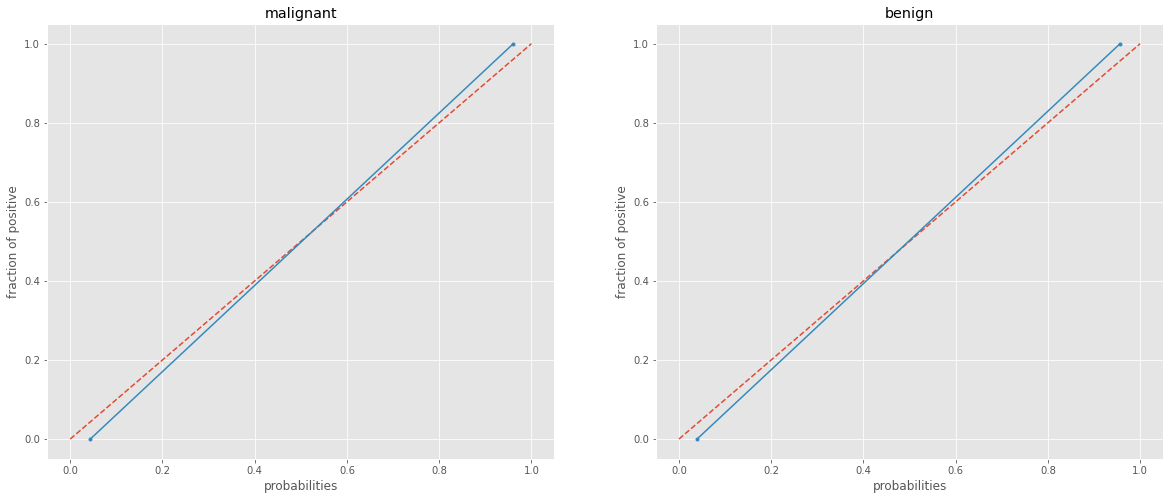

ECE SCORE FOR malignant = 0.041958
ECE SCORE FOR benign = 0.041958


({0: array([0.04347826, 0.96078431]), 1: array([0.03921569, 0.95652174])},
 {0: array([0., 1.]), 1: array([0., 1.])})

In [6]:
scoring.reliability_diagram_simple(y_test,pred_model[0],['malignant', 'benign'],types='non_dl')

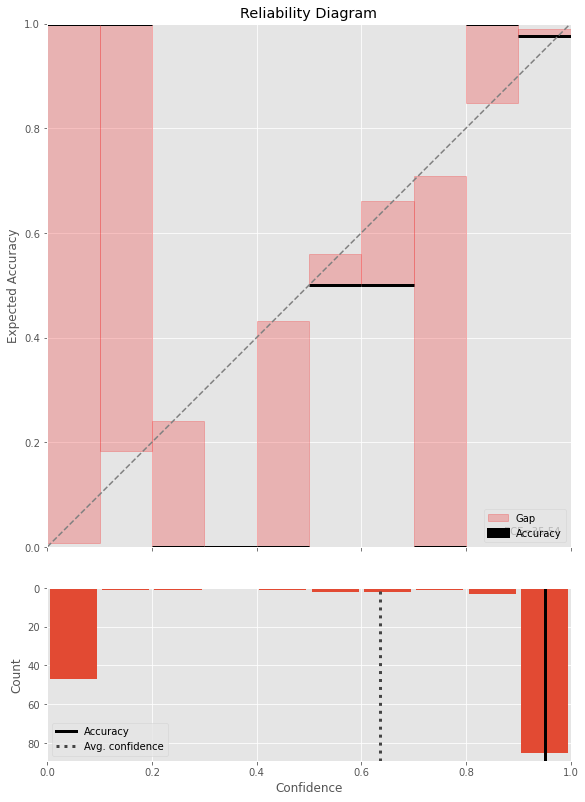

In [36]:
scoring.reliability_diagram(y_test,pred_model[0],probs_model[0])

# Generalizing confusion matrix

In [8]:
cf_matrix = np.asarray([
                    [5,1,0,0,0,0],
                    [0,5,0,0,0,0],
                    [0,1,5,1,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,5,0],
                    [0,0,1,0,0,5]])

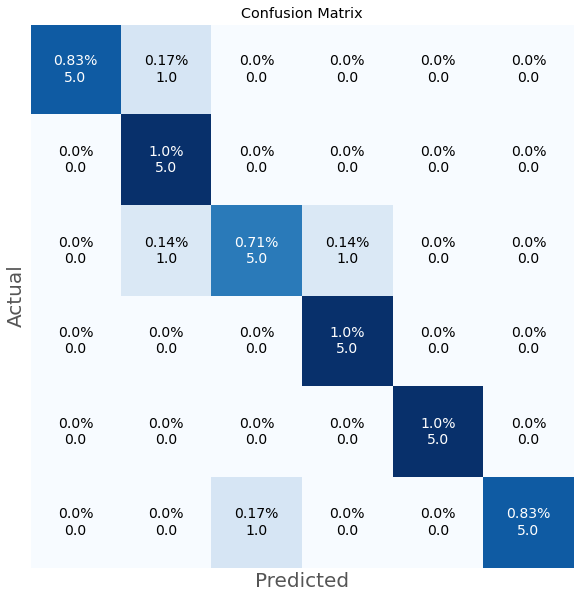

In [14]:
gen_cfmatrix = scoring.generalize_cfmatrix(cf_matrix, 6,labels=None)

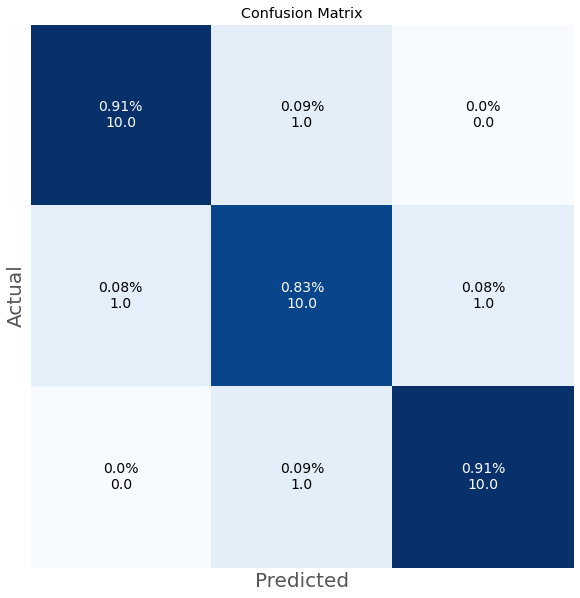

In [15]:
gen_cfmatrix = scoring.generalize_cfmatrix(cf_matrix, 3,labels=None)

# Decile Plots and KS statistic

In [11]:
decile_train,decile_test = scoring.deciling_plot(models[0],X_train,
                                                 y_train,X_test,y_test,
                                                 return_type='decile')

In [12]:
decile_train

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,43,43,0,100.000000,43,0,16.104869,0.000000,16.104869
2.0,42,42,0,100.000000,85,0,31.835206,0.000000,31.835206
3.0,43,43,0,100.000000,128,0,47.940075,0.000000,47.940075
4.0,42,42,0,100.000000,170,0,63.670412,0.000000,63.670412
5.0,43,43,0,100.000000,213,0,79.775281,0.000000,79.775281
6.0,42,42,0,100.000000,255,0,95.505618,0.000000,95.505618
7.0,43,12,31,27.906977,267,31,100.000000,19.496855,80.503145
8.0,42,0,42,0.000000,267,73,100.000000,45.911950,54.088050


In [13]:
decile_test

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,15,15,0,100.000000,15,0,16.666667,0.000000,16.666667
2.0,14,14,0,100.000000,29,0,32.222222,0.000000,32.222222
3.0,14,14,0,100.000000,43,0,47.777778,0.000000,47.777778
4.0,14,14,0,100.000000,57,0,63.333333,0.000000,63.333333
5.0,14,14,0,100.000000,71,0,78.888889,0.000000,78.888889
6.0,15,13,2,86.666667,84,2,93.333333,3.773585,89.559748
7.0,14,6,8,42.857143,90,10,100.000000,18.867925,81.132075
8.0,14,0,14,0.000000,90,24,100.000000,45.283019,54.716981


In [14]:
scores_train, scores_test = scoring.deciling_plot(models[0],X_train,
                                                 y_train,X_test,y_test,
                                                 return_type='score')

In [78]:
scores_train.loc[]

,SCORE,DECILE,TARGET,NONTARGET
0,0.00,10.0,0,1
1,1.00,4.0,1,0
2,0.00,10.0,0,1
3,0.00,10.0,0,1
4,0.00,10.0,0,1
...,...,...,...,...
421,0.17,7.0,0,1
422,0.00,9.0,0,1
423,0.01,8.0,0,1
424,0.00,9.0,0,1


In [79]:
scores_test

,SCORE,DECILE,TARGET,NONTARGET
0,1.00,3.0,1,0
1,0.00,10.0,0,1
2,0.61,7.0,1,0
3,0.93,6.0,1,0
4,0.68,7.0,0,1
...,...,...,...,...
138,0.83,6.0,1,0
139,0.99,3.0,1,0
140,1.00,1.0,1,0
141,0.93,5.0,1,0


# Lift chart, Actual vs predicted and Gains chart

,DECILE,ACTUAL,PRED,TOTAL_TARGET,TOTAL_NON_TARGET,DIST_TAR,DIST_NONTAR,SPREAD,LIFT @decile,LIFT
0,10.0,100.000000,100.000000,43,0,16.104869,0.000000,16.104869,NaN,1.610487
1,20.0,100.000000,100.000000,85,0,31.835206,0.000000,31.835206,157.303371,1.591760
2,30.0,100.000000,100.000000,128,0,47.940075,0.000000,47.940075,161.048689,1.598002
3,40.0,100.000000,99.452381,170,0,63.670412,0.000000,63.670412,157.303371,1.591760
4,50.0,100.000000,98.534884,213,0,79.775281,0.000000,79.775281,161.048689,1.595506
5,60.0,100.000000,92.523810,255,0,95.505618,0.000000,95.505618,157.303371,1.591760
6,70.0,27.906977,33.116279,267,31,100.000000,19.496855,80.503145,44.943820,1.428571
7,80.0,0.000000,2.904762,267,73,100.000000,45.911950,54.088050,0.000000,1.250000
8,90.0,0.000000,0.232558,267,116,100.000000,72.955975,27.044025,0.000000,1.111111
9,100.0,0.000000,0.000000,267,159,100.000000,100.000000,0.000000,0.000000,1.000000


,DECILE,ACTUAL,PRED,TOTAL_TARGET,TOTAL_NON_TARGET,DIST_TAR,DIST_NONTAR,SPREAD,LIFT @decile,LIFT
0,10.0,100.0,100.000000,15,0,16.666667,0.000000,16.666667,NaN,1.666667
1,20.0,100.0,100.000000,29,0,32.222222,0.000000,32.222222,155.555556,1.611111
2,30.0,100.0,99.214286,43,0,47.777778,0.000000,47.777778,155.555556,1.592593
3,40.0,100.0,98.357143,57,0,63.333333,0.000000,63.333333,155.555556,1.583333
4,50.0,100.0,95.642857,71,0,78.888889,0.000000,78.888889,155.555556,1.577778
5,60.0,80.0,82.000000,83,3,92.222222,5.660377,86.561845,133.333333,1.537037
6,70.0,50.0,38.928571,90,10,100.000000,18.867925,81.132075,77.777778,1.428571
7,80.0,0.0,4.571429,90,24,100.000000,45.283019,54.716981,0.000000,1.250000
8,90.0,0.0,0.785714,90,38,100.000000,71.698113,28.301887,0.000000,1.111111
9,100.0,0.0,0.000000,90,53,100.000000,100.000000,0.000000,0.000000,1.000000


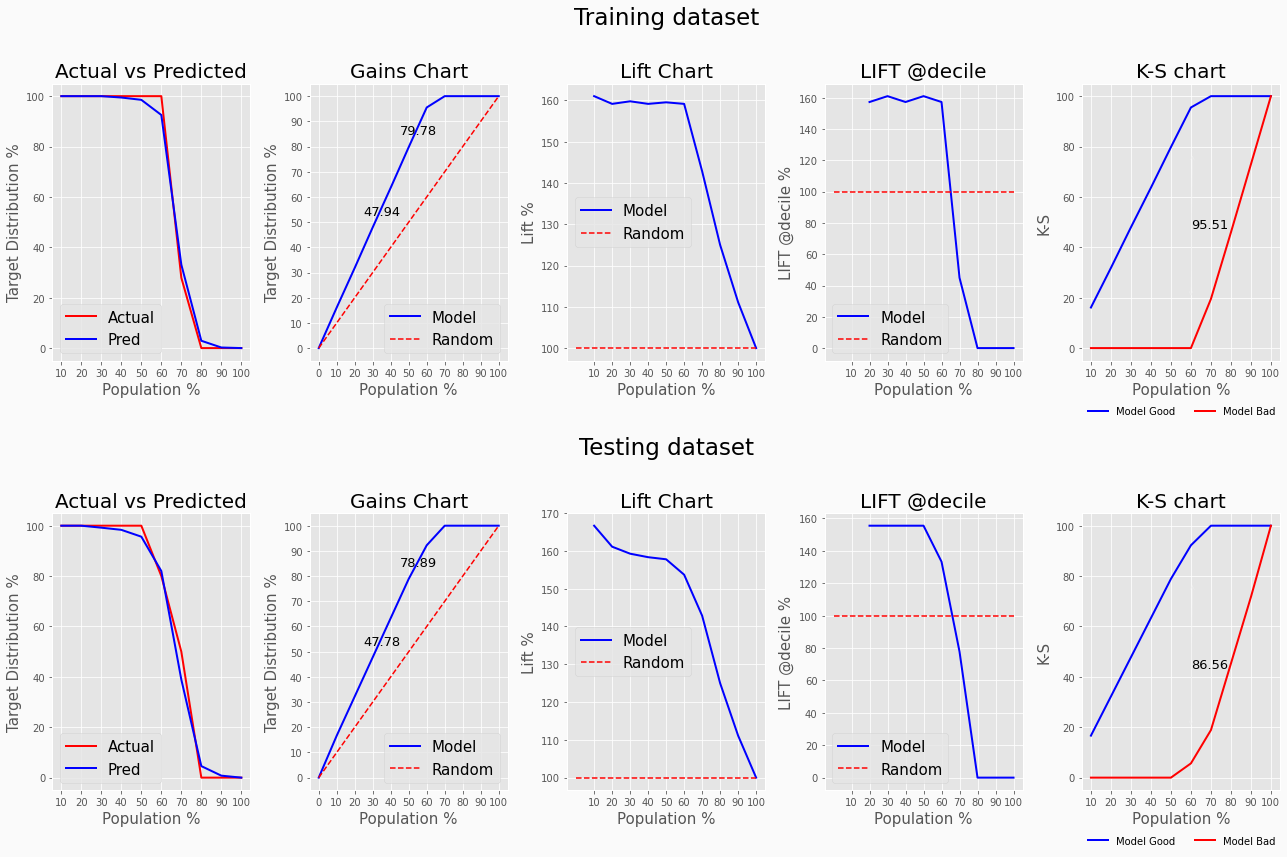

In [8]:
scoring.gains_plot(models[0],X_train,y_train,X_test,y_test)

# Multiple confusion matrix

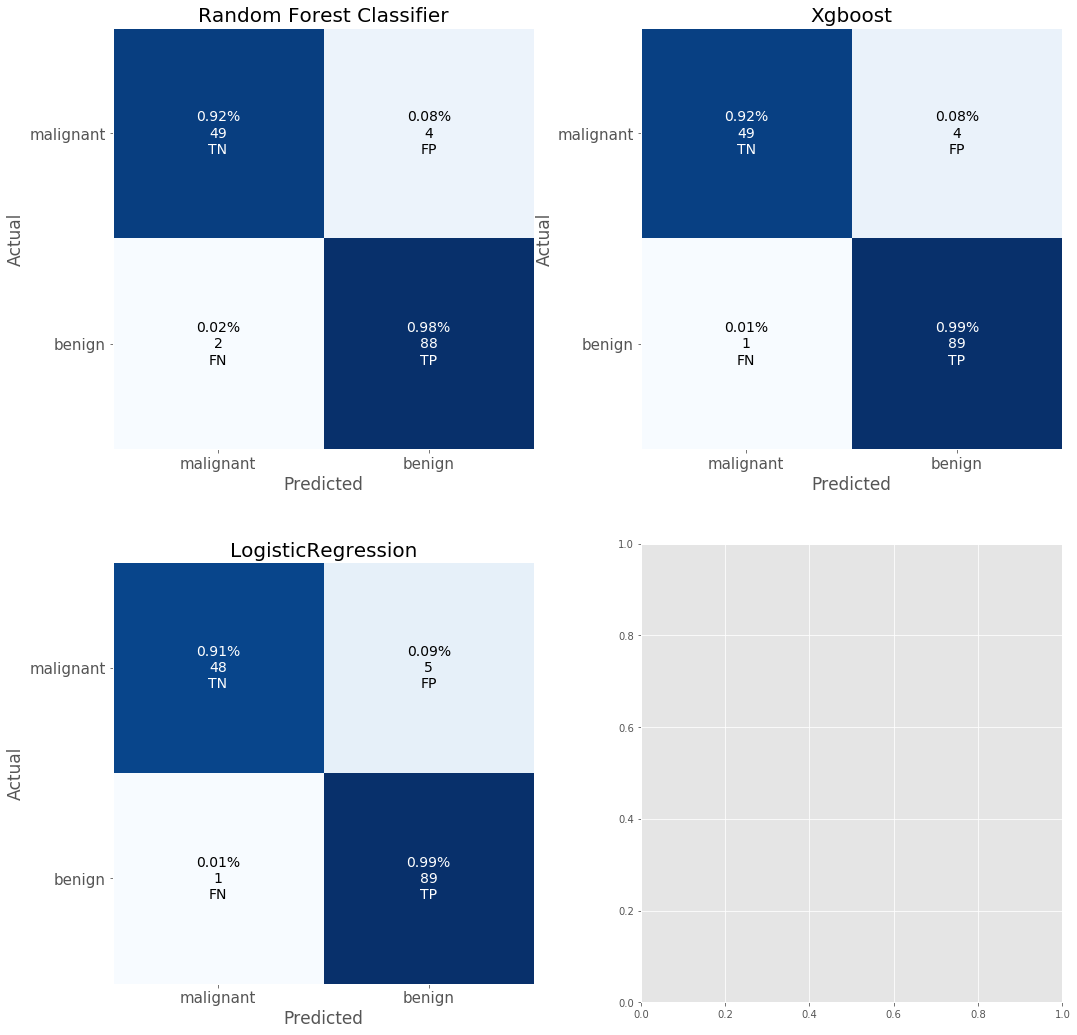

In [25]:
scoring.multiple_cm(labels=['malignant', 'benign'],
                                list_name=model_name,list_pred=pred_model,
                                y_test=y_test,shape=[2,2])

# Learning Curve

In [98]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

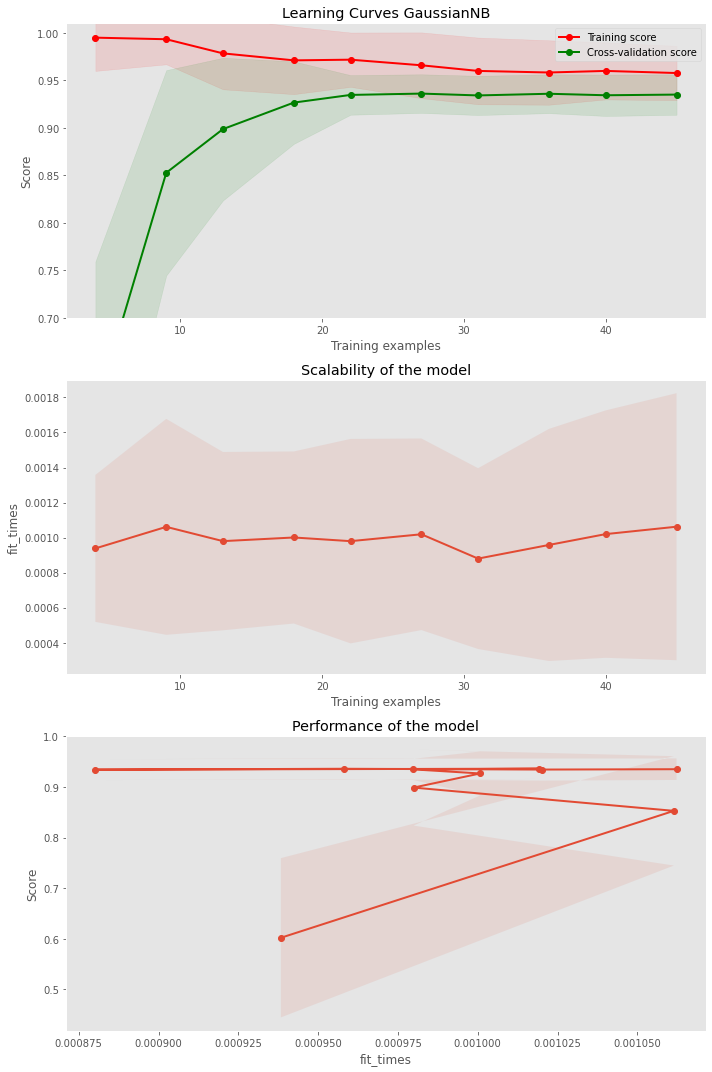

In [103]:
scoring.plot_learning_curve(cancer.data, cancer.target,"GaussianNB",nb,50,0.2)

# plot calibration curve

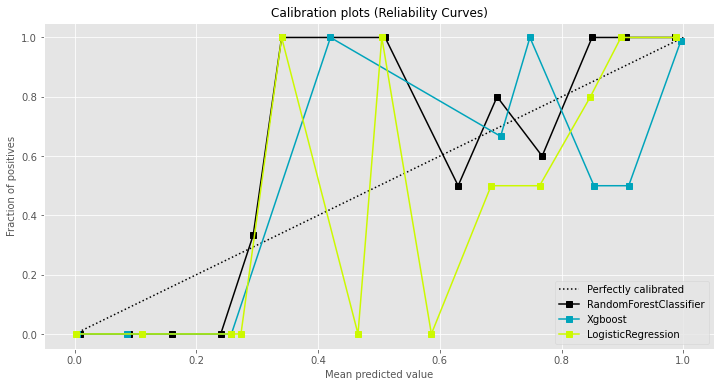

In [11]:
scoring.plot_calibration_curve(y_test, probs_model, clf_names=model_name, n_bins=15, 
                               title='Calibration plots (Reliability Curves)', 
                               ax=None, figsize=(12,6), cmap='nipy_spectral', 
                               title_fontsize="large", text_fontsize="medium")

# K-S plot

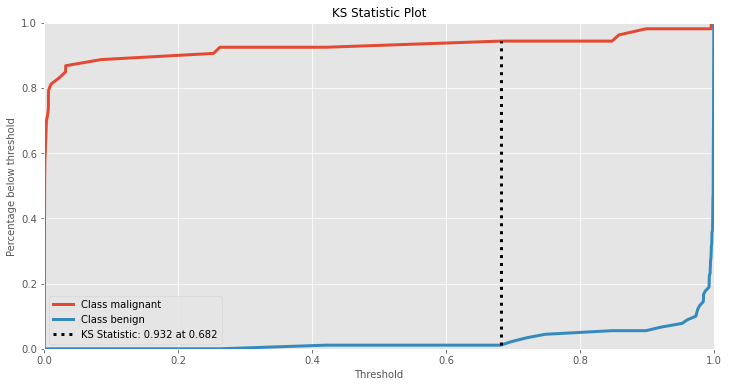

In [31]:
scoring.ks_plot(y_test, probs_dual_model[1],labels=['malignant', 'benign'], 
                title='KS Statistic Plot', 
                ax=None, figsize=(12,6), title_fontsize="large", 
                text_fontsize="medium")

# cumulative gain

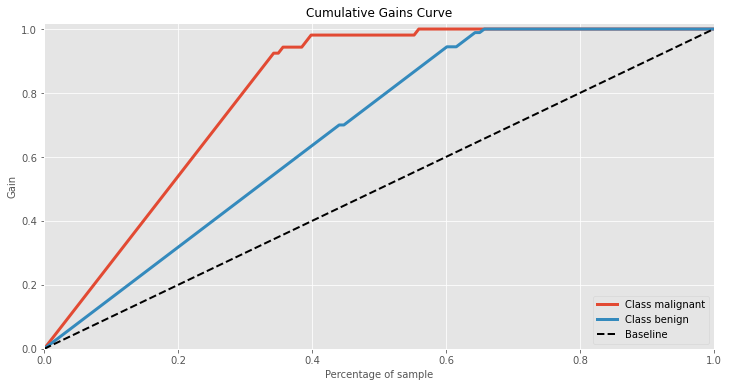

In [28]:
scoring.plot_cumulative_gain(y_test, probs_dual_model[1],labels=['malignant', 'benign'], 
                             title='Cumulative Gains Curve', 
                             ax=None, figsize=(12,6), title_fontsize="large", 
                             text_fontsize="medium")

# plot lift curve

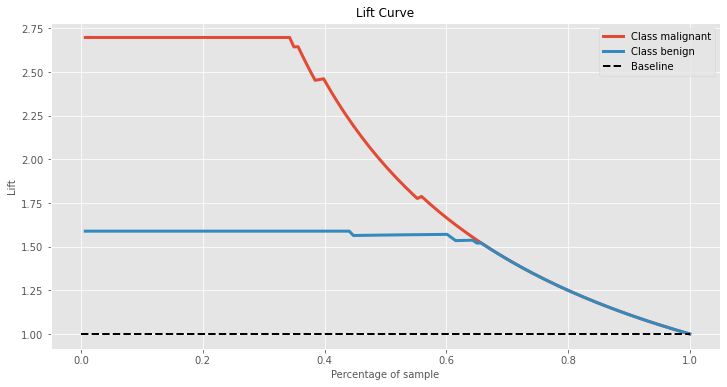

In [35]:
scoring.plot_lift_curve(y_test, probs_dual_model[1],labels=['malignant', 'benign'],
                        title='Lift Curve',figsize=(12,6), title_fontsize="large", 
                        text_fontsize="medium")

# Probability Distribution

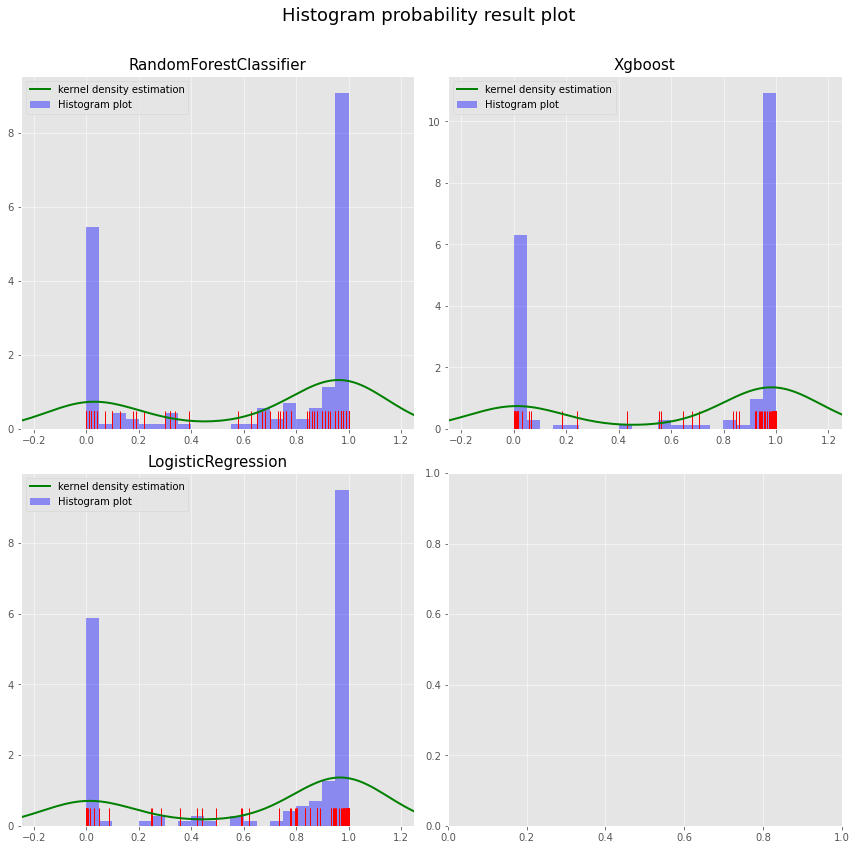

In [156]:
scoring.proba_dist(probs_model,20,names_model,amount='all',shape=[2,2])

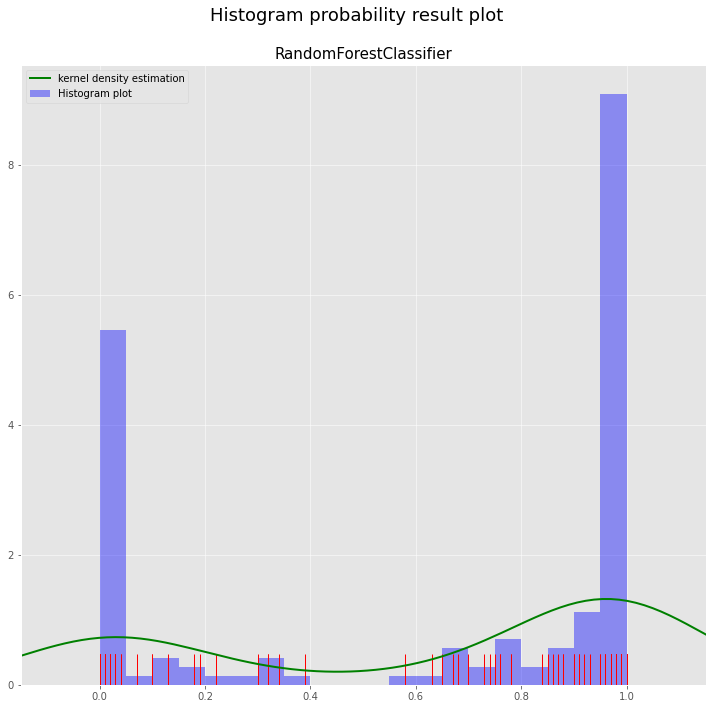

In [157]:
scoring.proba_dist(probs_model[0],20,names_model[0],amount='single',shape=[2,2])

# Multiple ROC and PR plot

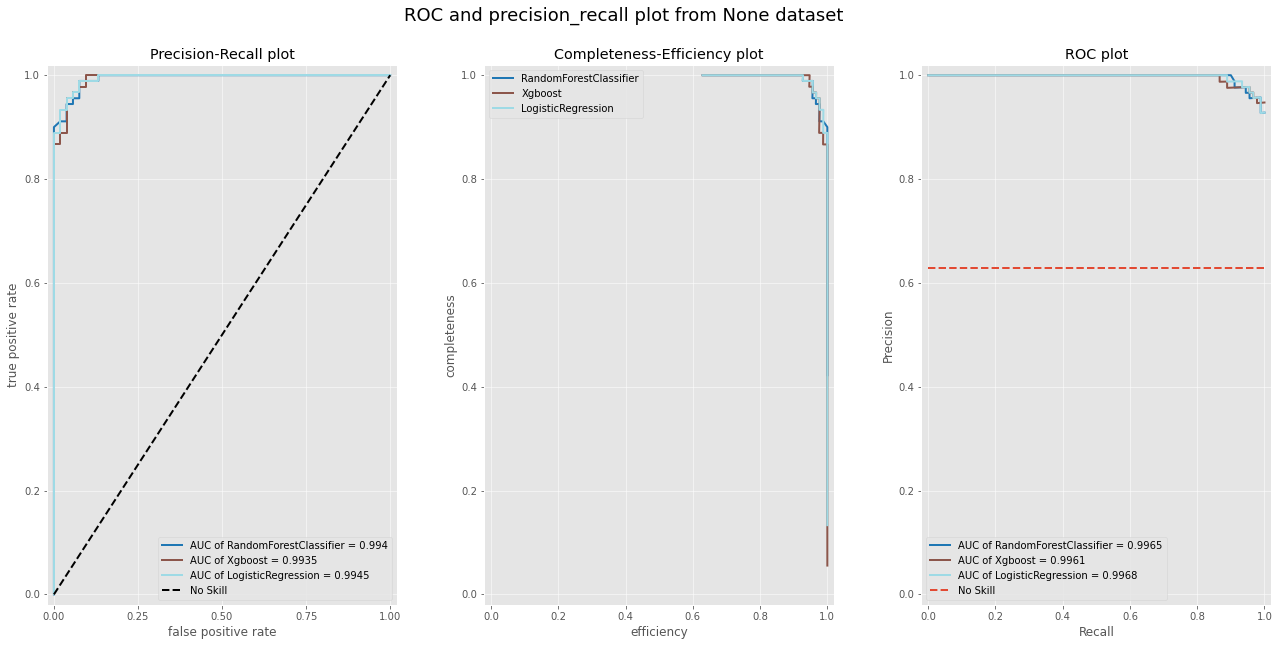

In [184]:
scoring.multiple_roc_pr(y_test,names_model,probs_model,pred_model)

# Multiple training model

In [47]:
result,proba = model.cv_model_train(X_train, y_train,
                                      ['all'],n_splits=5)

Finished training for model:
Decision Tree
Random Forest
Ada Boosting
Gradient Boosting
[11:53:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

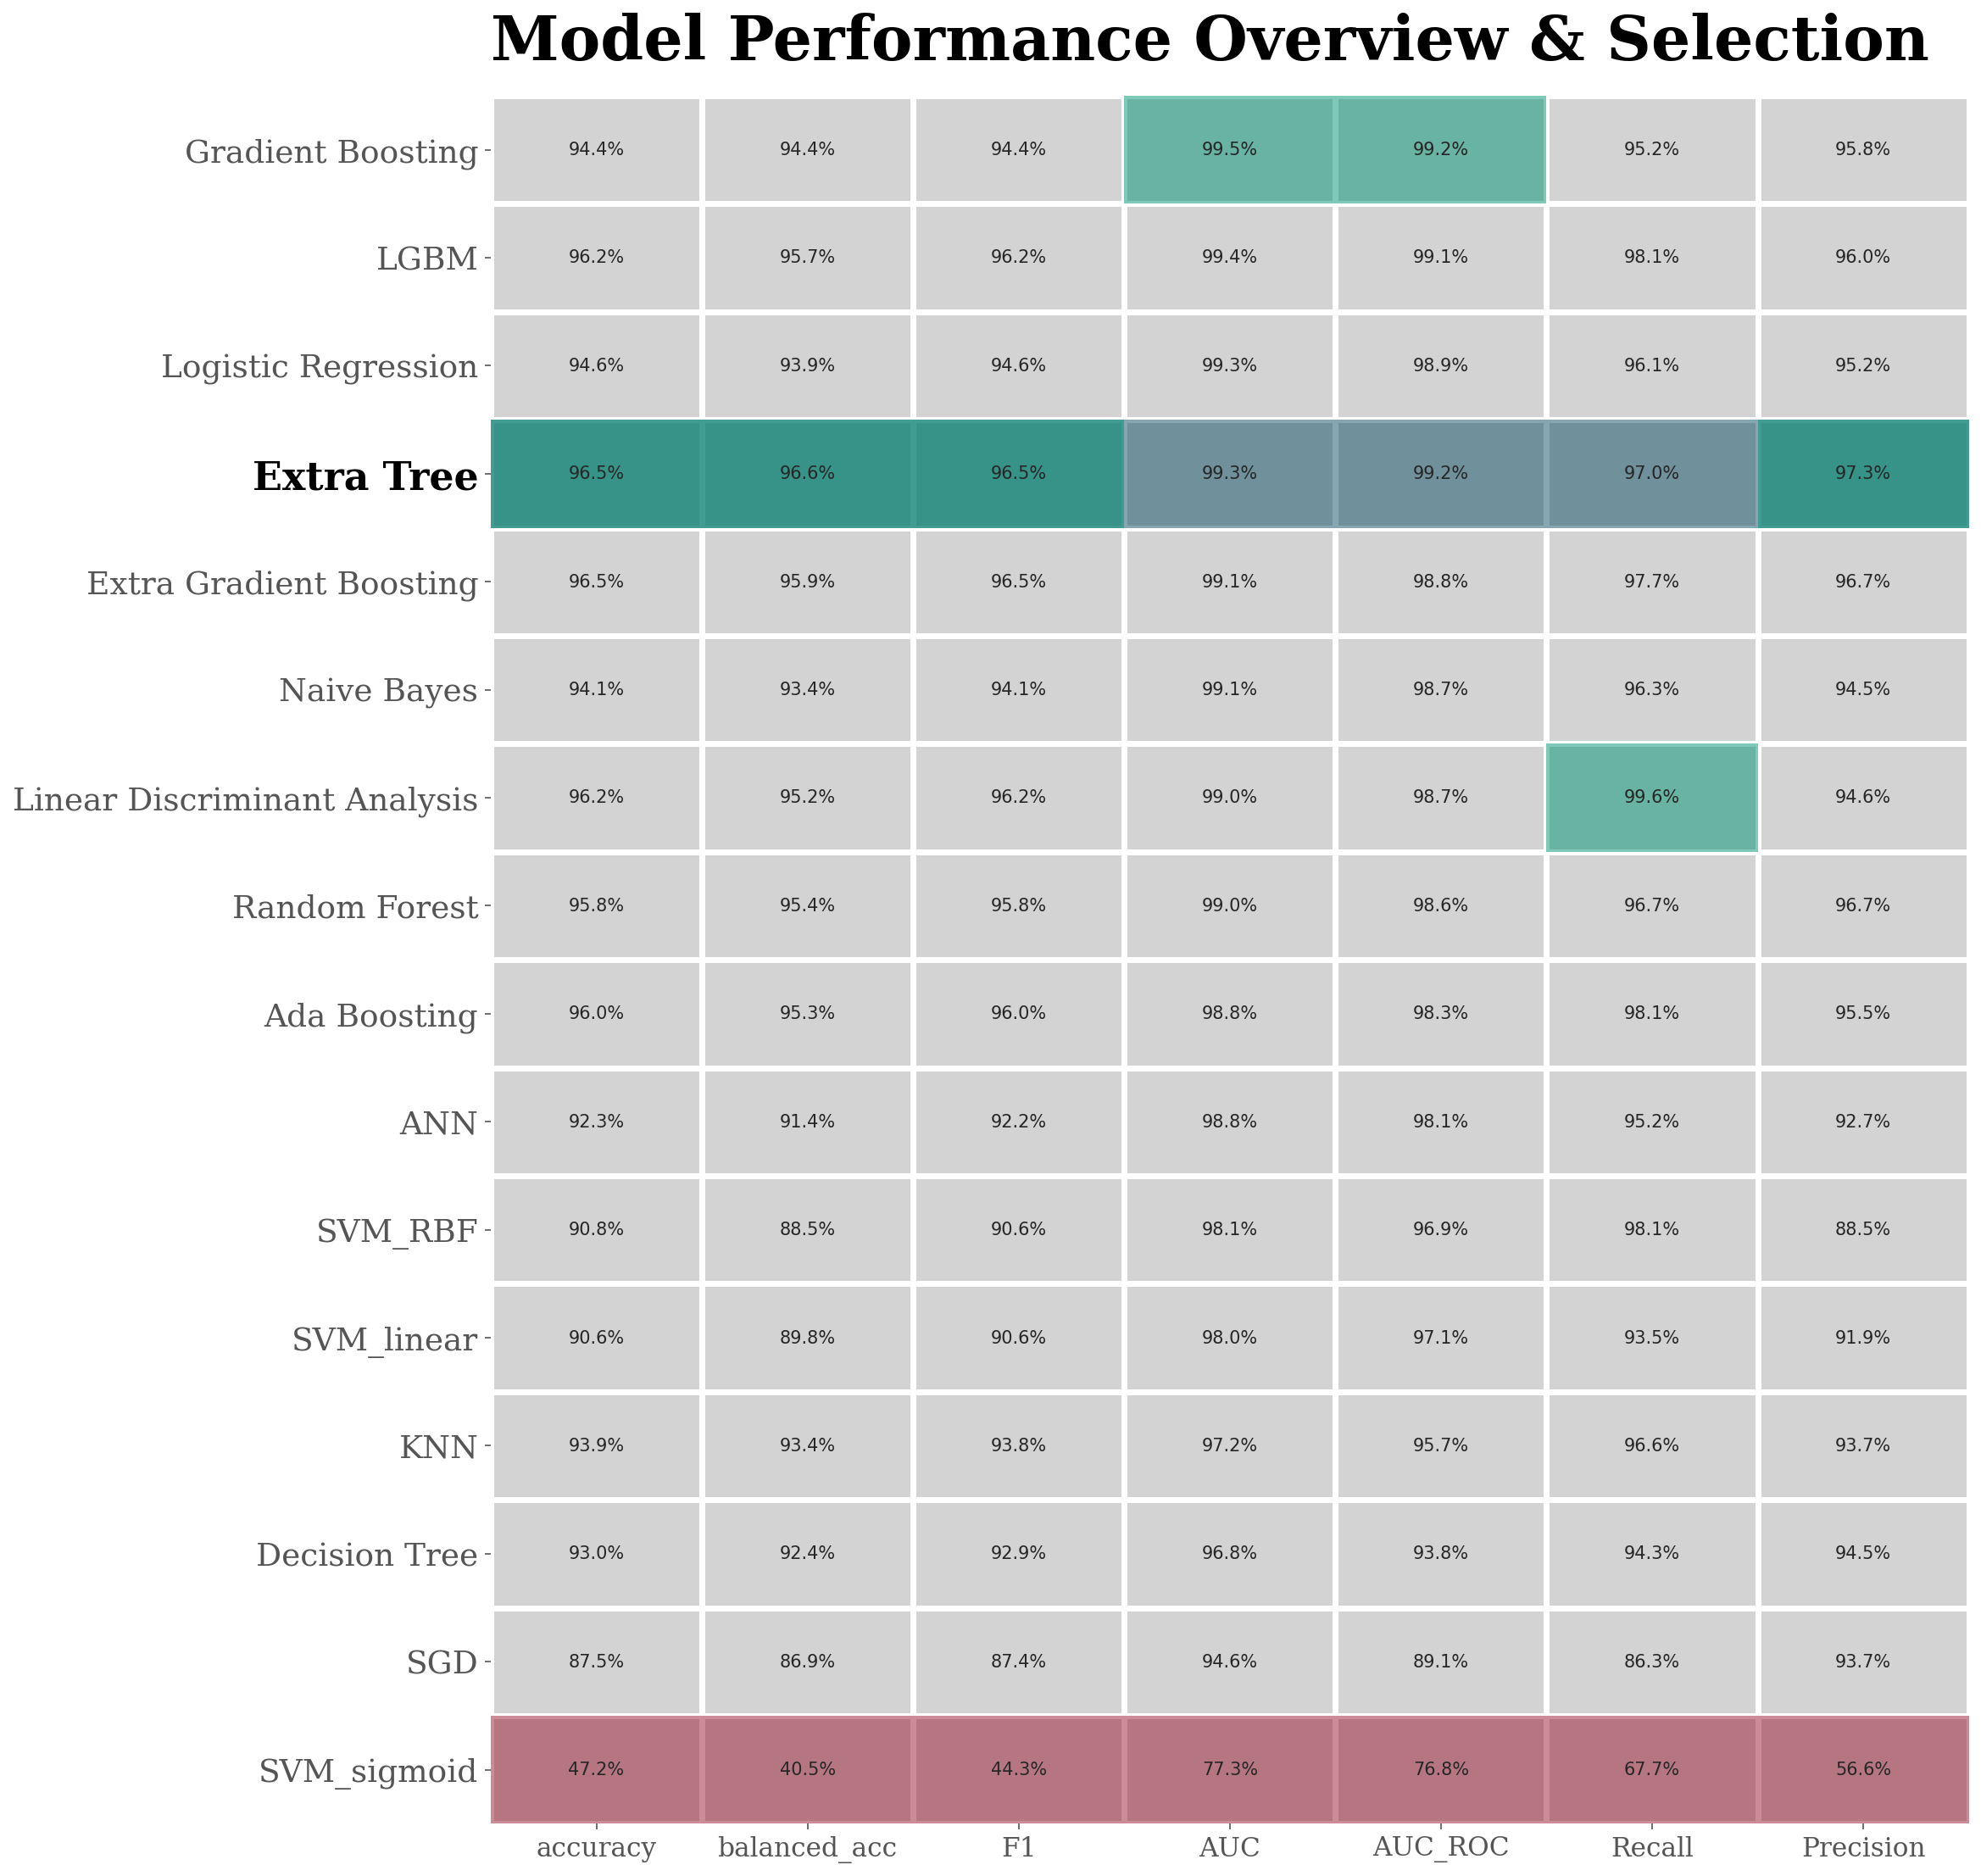

In [63]:
score = 'accuracy'
col = ["accuracy","balanced_acc","F1","AUC","AUC_ROC","Recall","Precision"]
scoring.multiple_training_model(result,score,col)